# 1. Introduction

Welcome to this notebook where we will venture into the world of Machine Learning with one of its simplest, yet powerful techniques: Linear Regression. Here, we will predict the median price of homes in various Boston neighborhoods, using the widely-used Boston Housing dataset. This is a regression task, meaning we are trying to predict a continuous value (house prices) rather than a discrete label (e.g., spam or not-spam). Let's dive right in!

# 2. Importing the Necessary Libraries

As a good practice, we always start by importing all the libraries we'll need at the top. This makes it clear what our dependencies are, and ensures we have everything we need before we start coding.

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# 3. Loading the Dataset

Now, let's load the Boston Housing dataset.

In [2]:
data = pd.read_csv('../data/glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 4. Preprocessing for EDA ( if necessary )

In [5]:
# Code

# 5. Exploratory Data Analysis ( EDA )

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/...` for a Cheat Sheet on all the basic things to look for.

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

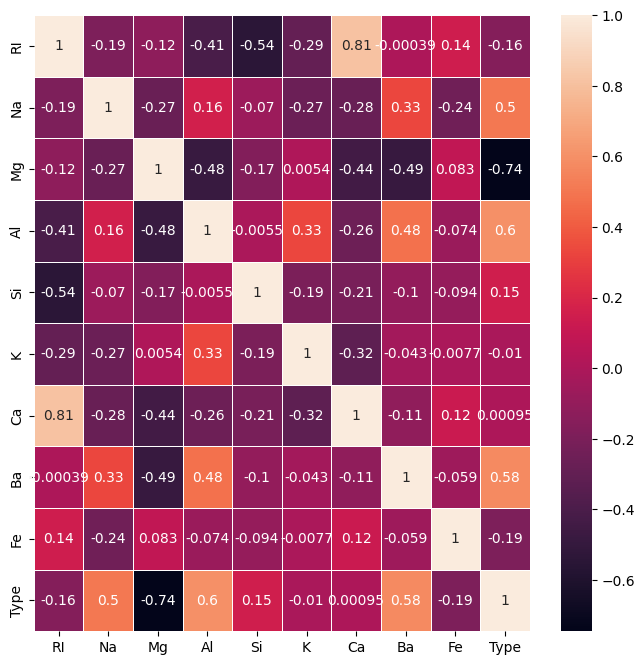

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

<Axes: xlabel='Type'>

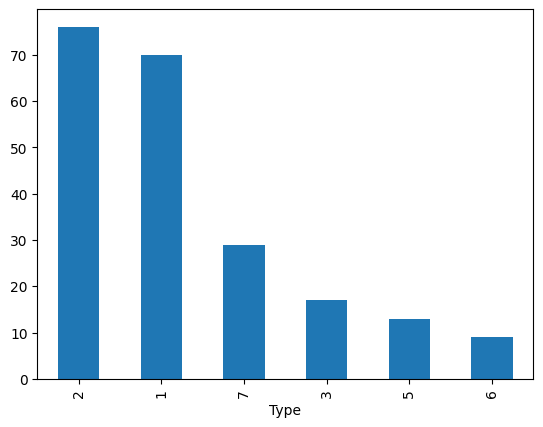

In [9]:
data["Type"].value_counts().plot(kind="bar")

<Axes: xlabel='RI', ylabel='Na'>

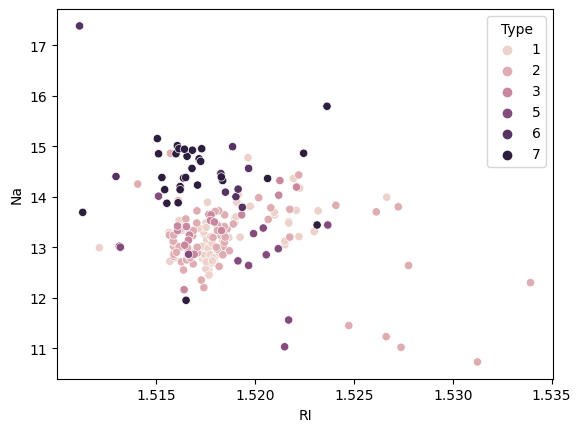

In [11]:
sns.scatterplot(data=data, x="RI", y="Na", hue="Type")

# 6. Data Preprocessing

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/Preprocessing.md` for a Cheat Sheet on all the basic things to look for.

In [12]:
X = data.drop("Type", axis=1)
y = data["Type"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Model Implementation

Finally, we come to the heart of our notebook: implementing the Linear Regression model! We'll fit the model to our training data and make predictions on our testing data.

In [18]:
k_values = [i for i in range(1, 30)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())


<Axes: >

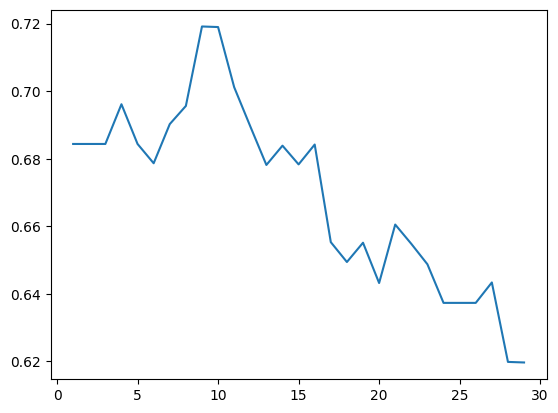

In [19]:
sns.lineplot(x=k_values, y=scores)

In [20]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)

# 8. Model Evaluation

After we've made our predictions, we need to evaluate how well our model did. This will usually involve some sort of error metric, like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

<Axes: >

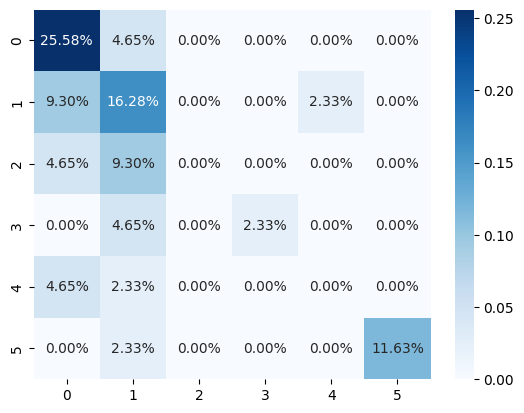

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [23]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.5581395348837209


# 9. Conclusion

In this final section, we'll recap what we've done and learned in this notebook. We might also discuss what we could do in future projects or how we could improve our current model.

Remember, these are just guidelines. Your notebook should reflect your own style and approach to data science. The most important thing is that your notebook is clear, logical, and informative. Happy coding!

Note: You can insert these section headings into your Jupyter notebook by changing a cell's type to "Markdown" and typing in the text. You can run a markdown cell in the same way you'd run a code cell (Shift+Enter).

--- Conclusion ---